# Week 13 Assignment: Analyzing Top Five Correlated Features and Precision to Determine of Mushroom is Poisonous or Edible

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import requests

## Import Data File

In [73]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

header_list = ['edible_poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

mushroom_data = pd.read_csv(url, names=header_list)

mushroom_data['edible_poisonous_orig'] = mushroom_data['edible_poisonous']

mushroom_data_orig = mushroom_data.copy()

print(mushroom_data.head())

  edible_poisonous cap-shape cap-surface cap-color bruises odor  \
0                p         x           s         n       t    p   
1                e         x           s         y       t    a   
2                e         b           s         w       t    l   
3                p         x           y         w       t    p   
4                e         x           s         g       f    n   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0               f            c         n          k  ...   
1               f            c         b          k  ...   
2               f            c         b          n  ...   
3               f            c         n          n  ...   
4               f            w         b          k  ...   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                   

## Create function to transform data (maintaining edible_poisonous category)

In [110]:
encode = LabelEncoder()

def transform_data(dataframe):
    for col in dataframe.columns[0:23]: 
        #CLEAN UP DATA AND VECTORIZE (PRESERVE EDIBLE_POISONOUS CATEGORY)
        
        dataframe.dropna(inplace=True)
        
        dataframe['%s' % col] = encode.fit_transform(dataframe['%s' % col])

    return dataframe

mushroom_data = transform_data(dataframe=mushroom_data)

print(mushroom_data.head())

   edible_poisonous  cap-shape  cap-surface  cap-color  bruises  odor  \
0                 1          5            2          4        1     6   
1                 0          5            2          9        1     0   
2                 0          0            2          8        1     3   
3                 1          5            3          8        1     6   
4                 0          5            2          3        0     5   

   gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                1             0          1           4  ...   
1                1             0          0           4  ...   
2                1             0          0           5  ...   
3                1             0          1           5  ...   
4                1             1          0           4  ...   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       

## Determine Highest Correlation Features to edible_poisonous Values

In [4]:
plt.figure(figsize=(12,10))
cor = mushroom_data[0:23].corr()
cor.sort_values(by=['edible_poisonous'], inplace = True, ascending=False)
edib_corr = cor['edible_poisonous']
print(edib_corr)

edible_poisonous            1.000000
gill-size                   0.910840
odor                        0.731603
stalk-root                  0.699206
cap-shape                   0.544709
population                  0.450592
habitat                     0.379518
cap-surface                 0.342286
bruises                     0.335083
ring-type                   0.282843
gill-color                  0.160077
stalk-surface-below-ring    0.155700
spore-print-color          -0.162650
gill-spacing               -0.282843
stalk-shape                -0.282843
cap-color                  -0.337936
gill-attachment                  NaN
stalk-surface-above-ring         NaN
stalk-color-above-ring           NaN
stalk-color-below-ring           NaN
veil-type                        NaN
veil-color                       NaN
ring-number                      NaN
Name: edible_poisonous, dtype: float64


<Figure size 864x720 with 0 Axes>

In [112]:
for row in edib_corr.index[1:6]:
    print(row);


gill-size
odor
stalk-root
cap-shape
population


## Plot Top Five Correlating Features

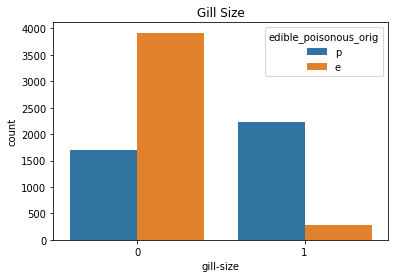

In [6]:
sns.countplot(x= 'gill-size',  hue = 'edible_poisonous_orig',data=mushroom_data).set_title('Gill Size');

### Re-Convert the Transformed Data to See Observations

In [101]:
gillsize_orig = list(mushroom_data_orig['gill-size'].unique())

encoded_data, mapping_index = pd.Series(gillsize_orig).factorize()

gillsize_vocab = dict(zip(list(mapping_index), encoded_data)) 
        
print(gillsize_vocab)

{'n': 0, 'b': 1}


### Observation: Edible mushrooms tend to have a gill size of n while poisonous tend to have a gill size of b.

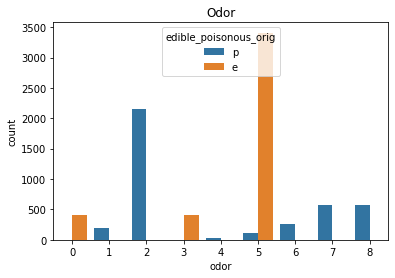

In [7]:
sns.countplot(x= 'odor',  hue = 'edible_poisonous_orig',data=mushroom_data).set_title('Odor');

In [102]:
odor_orig = list(mushroom_data_orig['odor'].unique())

encoded_data, mapping_index = pd.Series(odor_orig).factorize()

odor_vocab = dict(zip(list(mapping_index), encoded_data)) 
        
print(odor_vocab)

{'p': 0, 'a': 1, 'l': 2, 'n': 3, 'f': 4, 'c': 5, 'y': 6, 's': 7, 'm': 8}


### Observations: Edible mushrooms tend to have an odor of c while poisonous mushrooms tend highly likely have an odor of l, y, s or m. 

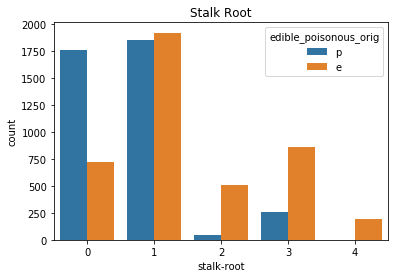

In [8]:
sns.countplot(x= 'stalk-root',  hue = 'edible_poisonous_orig',data=mushroom_data).set_title('Stalk Root');

In [104]:
stalkroot_orig = list(mushroom_data_orig['stalk-root'].unique())

encoded_data, mapping_index = pd.Series(stalkroot_orig).factorize()

stalkroot_vocab = dict(zip(list(mapping_index), encoded_data)) 
        
print(stalkroot_vocab)

{'e': 0, 'c': 1, 'b': 2, 'r': 3, '?': 4}


### Observations: Edible mushrooms tend to have an r and b stalkroot. 

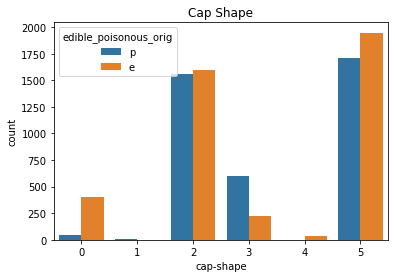

In [9]:
sns.countplot(x= 'cap-shape',  hue = 'edible_poisonous_orig',data=mushroom_data).set_title('Cap Shape');

In [105]:
capshape_orig = list(mushroom_data_orig['cap-shape'].unique())

encoded_data, mapping_index = pd.Series(capshape_orig).factorize()

capshape_vocab = dict(zip(list(mapping_index), encoded_data)) 
        
print(capshape_vocab)

{'x': 0, 'b': 1, 's': 2, 'f': 3, 'k': 4, 'c': 5}


### Observations: Mushrooms with a cap shape of k and x tend to be edible. 

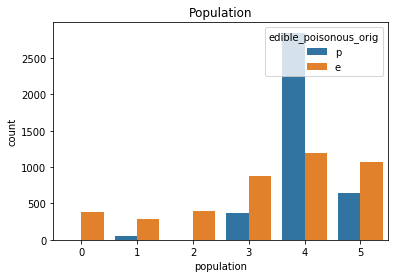

In [10]:
sns.countplot(x= 'population',  hue = 'edible_poisonous_orig',data=mushroom_data).set_title('Population');

In [106]:
pop_orig = list(mushroom_data_orig['population'].unique())

encoded_data, mapping_index = pd.Series(pop_orig).factorize()

pop_vocab = dict(zip(list(mapping_index), encoded_data)) 
        
print(pop_vocab)

{'s': 0, 'n': 1, 'a': 2, 'v': 3, 'y': 4, 'c': 5}


### Observation: Poisonous mushrooms have a population of y. 

# Project 4 Portion:

## Determine Precision of Random Forest Classifier Using Above Five Features

In [119]:
mushroom_highcorr_df = mushroom_data[['edible_poisonous', 'gill-size', 'odor', 'stalk-root', 'cap-shape', 'population']]

sc = StandardScaler()

X = mushroom_highcorr_df.drop('edible_poisonous', axis = 1)
y = mushroom_highcorr_df['edible_poisonous'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

ps = precision_score(y_test, pred_rfc, average='weighted', labels=np.unique(pred_rfc))
print('Random Forest Classifier Precision: {:.2%}'.format(ps))
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred_rfc))

Random Forest Classifier Precision: 99.31%
Confusion Matrix:
[[1280    0]
 [  17 1141]]


## Test RFC On the First Set of Feature Values to Check Prediction Against First Row

In [134]:
xtest = [[1, 6, 3, 5, 3]]

xtest = sc.transform(xtest)
ypred = rfc.predict(xtest)
print("Prediction States: %s" % ypred)

print("First Row States: %s" % mushroom_data.loc[0][0])

Prediction States: [1]
First Row States: 1


### In conclusion, using the Random Forest Classifier, the top five correlated features can determine an approximate recision of 99% prediction as to whether a mushroom is poisonous or edible.